### EXPLANATORY DATA VISUALIZATIONS OF KEY INSIGHTS 

##### Summary of Key Insights
- _Current and Completed listings constitutes over 70% of the total listings._
- _There is a strong positive relationship between BorrowerRate and LenderYield._
- _There is a normal distribution of borrower rates in 2005, 2006, 2007, 2008, 2009, and 2013._
- _The yearly sum of borrower rates for each employment status changes with time._

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.family': 'cursive'})

##### Loading and Cleaning the data

In [2]:
# read in the downloaded prosper loan data set.

loan_df = pd.read_csv(r'C:\Users\SAMUEL\Documents\Udacity Project\EDA\prosperLoanData.csv')

In [3]:
# Structure of the dataset before preliminary wranglinng

loan_df.shape

(113937, 81)

In [4]:
# replacing numerical values in the ListingCategory column with their corresponding name

loan_df['ListingCategory (numeric)'] = loan_df['ListingCategory (numeric)'].replace({0: "Not Available", 1: "Debt Consolidation", 2: "Home Improvement", 3: "Business", 4: "Personal Loans", 5: "Student Use", 6: "Auto", 7: "Other", 8: "Baby & Adoption", 9: "Boat", 10: "Cosmetic Procedure", 11: "Engagement Ring", 12: "Green Loans", 13: "Household expenses", 14: "Large Purchases", 15: "Medical/Dental", 16: "Motorcycle", 17: "RV", 18: "Taxes", 19: "Vacation", 20: "Wedding Loans"})

In [5]:
# renaming ProsperRating (numeric), ProsperRating (Alpha), and ListingCategory (numeric) to avoid white spaces

loan_df.rename(columns={'ProsperRating (numeric)':'ProsperRating_Numeric', 'ProsperRating (Alpha)':'ProsperRating_Alpha', 'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

In [6]:
# Merging CreditGrade with ProsperRating_Alpha to create a new column Credit_Grade
# Replacing values in the newly created column to create another column, Credit_Grade_Numeric 

loan_df['Credit_Grade'] = loan_df['CreditGrade'].fillna('') + loan_df['ProsperRating_Alpha'].fillna('')
loan_df['Credit_Grade_Numeric'] = loan_df['Credit_Grade'].replace({"HR":1, "E":2, "D":3, "C":4, "B":5, "A":6, "AA":7, "":0, "NC":0})
loan_df['Credit_Grade'].replace({"": np.nan}, inplace = True)

In [7]:
# dropping the duplicates in ListingKey

duplicates = loan_df[['ListingKey']].query('ListingKey.duplicated()==True', engine='python').index
loan_df.drop(duplicates, axis = 0, inplace = True)

In [8]:
# dropping the top 1% values in the StatedMonthlyIncome column to reduce the effect of outliers

outliers_1 = loan_df['StatedMonthlyIncome'].sort_values(ascending=False).head(int(0.01*loan_df.shape[0])).index
loan_df.drop(outliers_1, axis=0, inplace=True)

In [9]:
# converting the data type of specific columns to datetime

loan_df['ListingCreationDate'] = pd.to_datetime(loan_df['ListingCreationDate'])
loan_df['ClosedDate'] = pd.to_datetime(loan_df['ClosedDate'])
loan_df['DateCreditPulled'] = pd.to_datetime(loan_df['DateCreditPulled'])
loan_df['FirstRecordedCreditLine'] = pd.to_datetime(loan_df['FirstRecordedCreditLine'])
loan_df['LoanOriginationDate'] = pd.to_datetime(loan_df['LoanOriginationDate'])

In [10]:
# Structure of the dataset after preliminary wrangling

loan_df.shape

(111936, 83)

##### Visualization 1

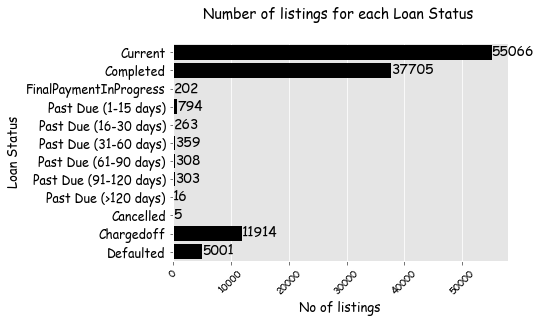

{'tags': ['to_remove'], 'slideshow': {'slide_type': 'fragment'}}

In [11]:
stat = loan_df['LoanStatus'].value_counts()
df = pd.DataFrame({'Status':stat.index, 'Counts':stat.values})

# sort Status values from completed to defaulted listings
df = df.loc[[0, 1, 9, 4, 8, 5, 6, 7, 10, 11, 2, 3]]

plt.style.use('ggplot')
fig, ax = plt.subplots()
plot = sns.barplot(x='Counts', y='Status', data=df, color='k')
plt.bar_label(plot.containers[0], color='k', size=14)
plt.xlabel('No of listings', fontsize=13, color='k')
plt.ylabel('Loan Status', fontsize=13,  color='k')
plt.title('Number of listings for each Loan Status \n', color='k')
plt.xticks(rotation=45, color='k')
plt.yticks(fontsize=12.5, color='k')
plt.show()

{
    "tags": [
        "to_remove"
    ],
    "slideshow": {
        "slide_type": "fragment"
    }
}

- _Current and Completed listings constitutes over 70% of the total listings, this concludes that Prosper Loan company has a very good risk management system._

##### Visualization 2

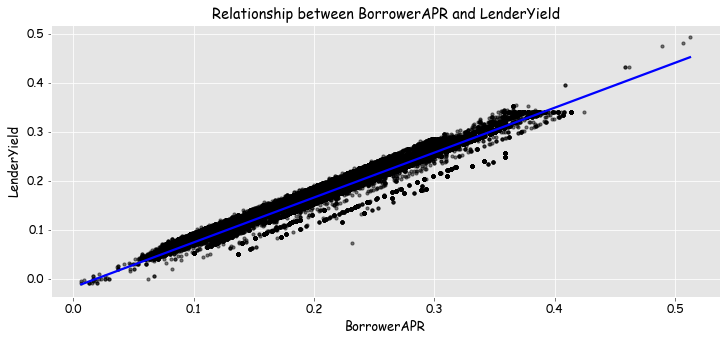

{'tags': ['to_remove'], 'slideshow': {'slide_type': 'fragment'}}

In [43]:
# scatterplot of BorrowerAPR vs Lender's yield
plt.figure(figsize=(12,5))
sns.regplot(x='BorrowerAPR', y='LenderYield', data=loan_df,
            scatter_kws={"color": "black", "s":10, "alpha":0.5}, line_kws={"color": "blue"})
plt.xticks(fontsize=12, c='k')
plt.yticks(fontsize=12, c='k')
plt.xlabel('BorrowerAPR', fontsize=13, c='k')
plt.ylabel('LenderYield', fontsize=13, c='k')
plt.title('Relationship between BorrowerAPR and LenderYield', c='k')
plt.show()

{
    "tags": [
        "to_remove"
    ],
    "slideshow": {
        "slide_type": "fragment"
    }
}

- _There is a strong positive relationship between BorrowerRate and LenderYield, that is the higher the borrower rate (interest rate), the higher the lender's yield, and vice versa._

##### Visualization 3

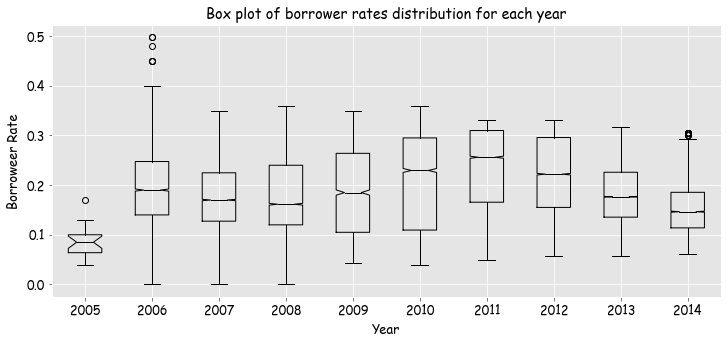

{'tags': ['to_remove'], 'slideshow': {'slide_type': 'fragment'}}

In [44]:
box_data = pd.DataFrame({'Year':list(loan_df['ListingCreationDate'].dt.year), 'Rates':list(loan_df['BorrowerRate'])})
Yr_05 = list(box_data.query('Year==2005')['Rates'])
Yr_06 = list(box_data.query('Year==2006')['Rates'])
Yr_07 = list(box_data.query('Year==2007')['Rates'])
Yr_08 = list(box_data.query('Year==2008')['Rates'])
Yr_09 = list(box_data.query('Year==2009')['Rates'])
Yr_10 = list(box_data.query('Year==2010')['Rates'])
Yr_11 = list(box_data.query('Year==2011')['Rates'])
Yr_12 = list(box_data.query('Year==2012')['Rates'])
Yr_13 = list(box_data.query('Year==2013')['Rates'])
Yr_14 = list(box_data.query('Year==2014')['Rates'])
data = [Yr_05, Yr_06, Yr_07, Yr_08, Yr_09, Yr_10, Yr_11, Yr_12, Yr_13, Yr_14]
yrs = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']

# Box plot of the distribution in borrower rates for each year
plt.figure(figsize=(12,5))
ax = plt.boxplot(data, notch=True, labels = yrs)
for median in ax['medians']:
    median.set(color='k')
plt.xticks(fontsize=12.5, c='k')
plt.yticks(fontsize=12.5, c='k')
plt.xlabel('Year', fontsize=13, c='k')
plt.ylabel('Borroweer Rate', fontsize=13, c='k')
plt.title('Box plot of borrower rates distribution for each year', c='k')
plt.show()

{
    "tags": [
        "to_remove"
    ],
    "slideshow": {
        "slide_type": "fragment"
    }
}

- _2006 saw the highest borrower rate of about 0.5_
- _There is a left skewed distribution of borrower rates in 2010, 2011, and 2012, i.e most values are less than the median_
- _There is a right skewed distribution of borrower rates in 2014, i.e most values are greater than the median_
- _The distribution in borrower rates for other years are normal_

##### Visualization 4

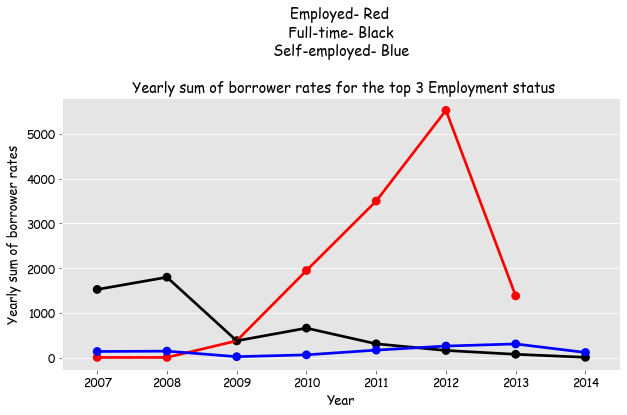

{'tags': ['to_remove'], 'slideshow': {'slide_type': 'fragment'}}

In [45]:
# The top 3 most common employment status are Employed, Full-time, and self-employed

df1 = loan_df.query('EmploymentStatus=="Employed"')['BorrowerRate'].groupby([loan_df['ListingCreationDate'].dt.year]).sum()
df2 = loan_df.query('EmploymentStatus=="Full-time"')['BorrowerRate'].groupby([loan_df['ListingCreationDate'].dt.year]).sum()
df3 = loan_df.query('EmploymentStatus=="Self-employed"')['BorrowerRate'].groupby([loan_df['ListingCreationDate'].dt.year]).sum()

# Point plots of the changes in the annual sum of borrower rates for selected employment status
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.pointplot(x = df1.index, y = df1.values, errwidth=0, color='r')
sns.pointplot(x = df2.index, y = df2.values, errwidth=0, color='k')
sns.pointplot(x = df3.index, y = df3.values, errwidth=0, color='b')

plt.xticks(fontsize=12, c='k')
plt.yticks(fontsize=12, c='k')
plt.xlabel('Year', fontsize=13, c='k')
plt.ylabel('Yearly sum of borrower rates', fontsize=13, c='k')
plt.title('Employed- Red \n Full-time- Black \n Self-employed- Blue \n\n Yearly sum of borrower rates for the top 3 Employment status')
plt.show()

{
    "tags": [
        "to_remove"
    ],
    "slideshow": {
        "slide_type": "fragment"
    }
}

- _The yearly sum of borrower rates for Full-time workers decreased with time_
- _The yearly sum of borrower rates for self-employed workers went about on a close range (from about 20 to 300)_
- _The yearly sum of borrower rates for employed workers increased with time until 2013 which saw a great depreciation_

In [12]:
!jupyter nbconvert ProsperLoan_Exploration_Part2.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook ProsperLoan_Exploration_Part2.ipynb to slides
[NbConvertApp] Writing 779067 bytes to ProsperLoan_Exploration_Part2.slides.html
